#Industrial safety NLP based Chatbot



Import necessary libraries 

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import nltk, re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter


import tensorflow as tf
from tensorflow.keras import preprocessing
tf.random.set_seed(4)
tf.__version__

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score, precision_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

#Importing model building libraries 
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional



from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Import the data

In [3]:
#mount the google drive 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Capstone project/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [5]:
data.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [6]:
print(data.columns)

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')


In [7]:
print("Shape of the Dataset:",data.shape)

Shape of the Dataset: (425, 11)


# Univariate Data Analysis


Univariate Data Alayasis Describes about data points, summarizes that data and finds patterns in the data

In [8]:
# Analysis on Contries column
data['Countries'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

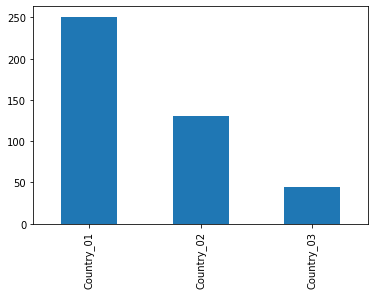

In [9]:
Countries = data['Countries'].value_counts() #visualisation of columns 
Countries.plot(kind='bar')

In the given dataset, 50% of data recorded from the Country_01, and the remaining 50% data from country_02, and Country_03.

In [10]:
#Analysis on city data
data['Local'].value_counts()

Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

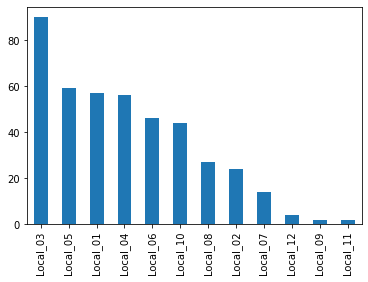

In [11]:
#Presenting city count data in visual format
city = data['Local'].value_counts()
city.plot(kind = 'bar')

Collected data from 11 different locations of plants. Location 09,11,12 places reported accidents are very less, As we don't have more details on the domain, we cant drop those columns.

In [12]:
#Analysis on Industry sector 
data['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

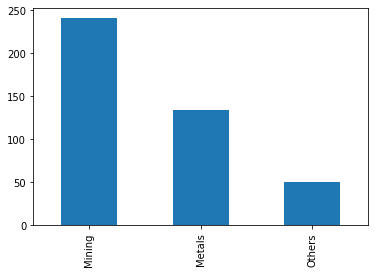

In [13]:
Industry_sector = data['Industry Sector'].value_counts()
Industry_sector.plot(kind = 'bar')

We are doing analysis on Mining and metals industries Incidents during the 
worktime.

In [14]:
#Analysis on Accident Level 
Acc_level = data['Accident Level'].value_counts()
Acc_level

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

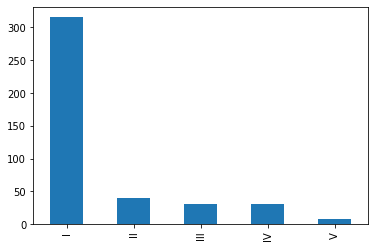

In [15]:
Acc_level.plot(kind='bar')

These are the different Accident Level given by the employees, it registers how severe was the accident (I means not severe but VI means very severe).

In [16]:
#Analysis of Potential Accident Level 
Pot_Acc_level = data['Potential Accident Level'].value_counts()
Pot_Acc_level

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

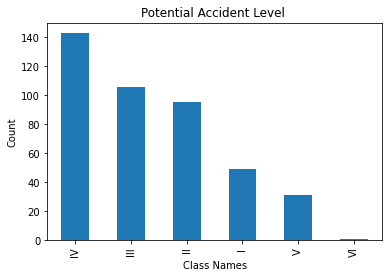

In [17]:
Pot_Acc_level.plot(kind = 'bar')
plt.title('Potential Accident Level ')
plt.ylabel('Count')
plt.xlabel('Class Names')
plt.show()

We are taking Potential Accident Level as a Target Observed classimbalnces in tha dataset.

In [18]:
#Analysis on Gender 
Gender=data['Genre'].value_counts()
Gender

Male      403
Female     22
Name: Genre, dtype: int64

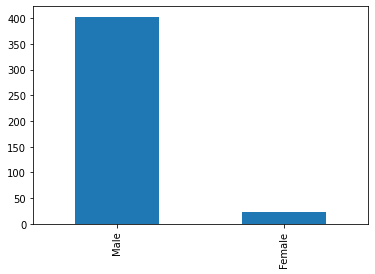

In [19]:
Gender.plot(kind = 'bar')

Observations: In the given dataset we have 400 plus Male employees are there 
and only 22 are females.

In [20]:
#Analysis with Employee status 
Third_Party=data['Employee or Third Party'].value_counts()
Third_Party

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

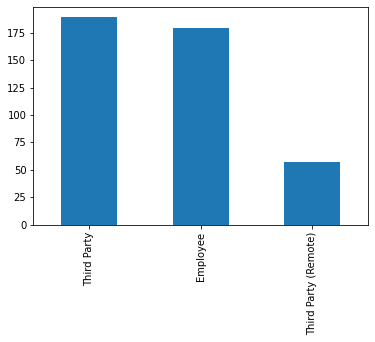

In [21]:
Third_Party.plot(kind = 'bar')

Three different kinds of employess are working in these industries



# Multivariate Data Analysis

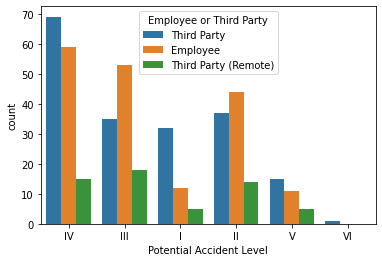

In [22]:
# Emplooyee category with Potential Accident level
sns.countplot(hue='Employee or Third Party',x = 'Potential Accident Level',data=data)

Observations: Here finding the relationship between target column and Employee type. Accidents happend to all the kinds of employees.

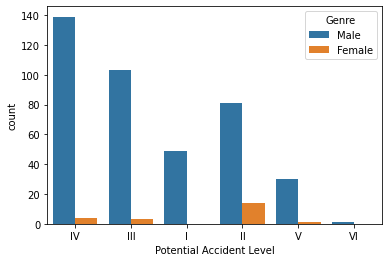

In [23]:
# Potential accident level with gender
sns.countplot(hue='Genre',x = 'Potential Accident Level',data=data)

Observations: Here I observed zero level 1 and level 6 Accidents for Female employees. Most of the accidents recorded on level 3.

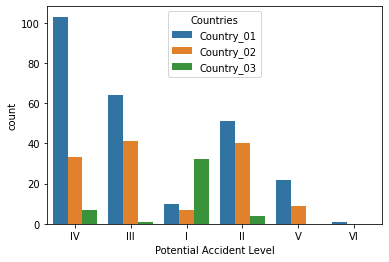

In [24]:
sns.countplot(hue='Countries',x = 'Potential Accident Level',data=data)

Observations: Most of the level 4 and level 3 accidents recorded in Country 1, in Country3 very few level 3 accidents were recorded.

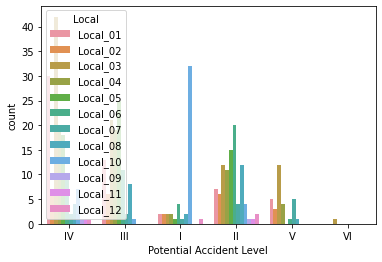

In [25]:
sns.countplot(hue='Local',x = 'Potential Accident Level',data=data)

Observations: More level 1 accidents are registed in location 10 and level 2 
accidents in location 5.



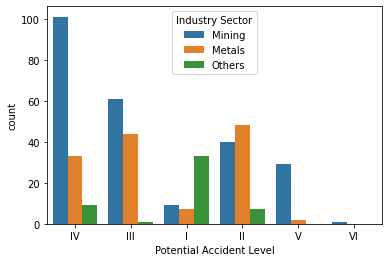

In [26]:
sns.countplot(hue='Industry Sector',x = 'Potential Accident Level',data=data)

Observations: Finding relationship between Indutry sector and Potential accident level.  In Mining sector recorded more acidents then other two sectors.

In [27]:
#Column names 
data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

# Data Pre-processing

In [28]:
print(data.info()) #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB
None


In [29]:
#Droping reamining colums 
data.drop(['Unnamed: 0', 'Data','Countries','Local', 'Industry Sector',
       'Accident Level', 'Genre','Employee or Third Party', 'Critical Risk'], axis = 1, inplace=True)

In [30]:
print("shape of the  new dataset:",data.shape)

shape of the  new dataset: (425, 2)


In [31]:
data.isnull().sum()

Potential Accident Level    0
Description                 0
dtype: int64

Observed: No Null values in dataset

In [32]:
data['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

Observations: Observed class imbalance in the Potential Accident Level column.

In [33]:
data.head(1) # Head of the datset

,Potential Accident Level,Description
0,IV,While removing the drill rod of the Jumbo 08 f...


UP Sample

Upsampling: Doing upsample to treat the class imbalance in the Potential Accident Level column, increasing the Accident level I,
V and dropping VI as we have only one data record related to level 6.

In [34]:
data1 = data[(data['Potential Accident Level']=='I')]
data2 = data[(data['Potential Accident Level']=='II')]
data3 = data[(data['Potential Accident Level']=='III')]
data4 = data[(data['Potential Accident Level']=='IV')]
data5 = data[(data['Potential Accident Level']=='V')]
data6 = data[(data['Potential Accident Level']=='VI')]

In [35]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)
print(data6.shape)

(49, 2)
(95, 2)
(106, 2)
(143, 2)
(31, 2)
(1, 2)


The above is original dataset we have, observed class imbalance in target varibule. Using multiple techniques,creating different dataset to implement ML and DL models.

#Sample1 dataset

In [36]:
from sklearn.utils import resample

data1_up = resample(data1,
                    replace=True,     # sample with replacement
                    n_samples=80,    # to match majority class
                    random_state=1)

data5_up = resample(data5,
                    replace=True,     # sample with replacement
                    n_samples=80,    # to match majority class
                    random_state=1)

In [37]:
print(data1_up.shape)
print(data5_up.shape)

(80, 2)
(80, 2)


In [38]:
data=pd.concat([data1_up,data2,data3,data4,data5_up])

In [39]:
data.shape

(504, 2)

In [40]:
data['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
V       80
I       80
Name: Potential Accident Level, dtype: int64

In [41]:
data.sort_index(inplace=True)

In [42]:
data.head()

,Potential Accident Level,Description
0,IV,While removing the drill rod of the Jumbo 08 f...
1,IV,During the activation of a sodium sulphide pum...
2,III,In the sub-station MILPO located at level +170...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...


In [43]:
data.reset_index(inplace=True,drop=True)

In [44]:
data.head(1)

,Potential Accident Level,Description
0,IV,While removing the drill rod of the Jumbo 08 f...


#Data augmentation

In [45]:
pip install textaugment

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 1.0MB 4.1MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 61kB 4.1MB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 102kB 5.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=72e15734db4a2a1d14ee93aac6fd7ef830bc35d53c369507b0f9c39c10a9e46a
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=ce5cc5f64a3c5d7e5e4a142a8c245a9e8a9daeb3956cbfc9e0ca576618c0575a
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [46]:
#These are libraries we need to implement data augmentation


import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from textaugment import Wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [48]:
#Copied one description column as a sample text to implement wordnet function 

sample_text = data['Description'][0]
print(sample_text)

#Calling wordnet function and replacing synonums of the veb forms 
text_augment= Wordnet(v=True ,n=False, p=0.5,runs=5)
text_augment.augment(sample_text)



While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.


'while transfer the drill rod of the jumbo 08 for maintenance, the supervisor proceeds to relax the support of the intermediate centralizer to facilitate the removal, understand this the mechanic supports one end on the drill of the equipment to pull with both pass the bar and quicken the removal from this, at this moment the bar slides from its point of support and fasten the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [49]:
text_augumented_data = pd.DataFrame()

In [51]:
#Implenting for the full dataset

sentences = data['Description']
descriptions = []
for sentence in sentences:
      text_augment= Wordnet(v=True ,n=False, p=0.5,runs=6)
      descriptions.append(text_augment.augment(sentence))
      
text_augumented_data['Description'] = pd.Series(descriptions)  #Changing list to pandas series dataframe 
print(text_augumented_data)

                                           Description
0    while dispatch the drill rod of the jumbo 08 f...
1    during the activation of a sodium sulphide pum...
2    in the sub-station milpo locate at level +170 ...
3    be 9:45 am. approximately in the nv. 1880 cx-6...
4    cost 9:45 am. approximately in the nv. 1880 cx...
..                                                 ...
499  cost approximately 5:00 a.m. approximately, wh...
500  the collaborator propel from the infrastructur...
501  during the environmental monitoring activity i...
502  the employee execute the activity of clean cat...
503  at 10:00 a.m., when the assistant clean the fl...

[504 rows x 1 columns]


In [52]:
text_augumented_data['Description'][0]


'while dispatch the drill rod of the jumbo 08 for maintenance, the supervisor proceeds to relax the support of the intermediate centralizer to alleviate the removal, understand this the mechanic supports one end on the drill of the equipment to pull with both give the bar and accelerate the removal from this, at this moment the bar slides from its point of support and fasten the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

Observations: Changing random verb forms in the original dataset descriptions and creating the new dataset.


#Data augmentation_easy data augmentation(EDA)



In [53]:
#Implementing easy data augmentation
from textaugment import EDA
nltk.download('stopwords')

import textaugment
textaugment.__version__




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'1.3.4'

In [54]:
#Replacing the synonyms for few words 

 
text_EDA = EDA(stop_words=None, random_state=1)
text_EDA.synonym_replacement(sample_text)

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to help the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [55]:
#Deleting the few words from original dataset

text_EDA = EDA(stop_words=None, random_state=1)
text_EDA.random_deletion(sample_text)

'While removing the drill rod of the Jumbo maintenance, the supervisor to loosen the support of centralizer to facilitate the removal, this the mechanic supports one end on the of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the slides from its point of support and tightens the fingers of the mechanic between bar and the beam of the jumbo.'

Observations: Applied all of these EDA techniques to complete the dataset and seen overfitting in results, so planning not to use techniques in the final model.

After this initial analysis to look at the overall dataset, the 'Potential Accident Level' column could be one-hot encoded so that it is ready for the learning model to take as targets.

Target column 

In [56]:
targetdf = pd.get_dummies(data['Potential Accident Level'])
targetdf

,I,II,III,IV,V
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
499,0,0,1,0,0
500,0,1,0,0,0
501,0,1,0,0,0
502,0,1,0,0,0


Now, finally it is time to apply natural language processing techniques to each of the individual text samples.

First, we define a pre-process function.

In [57]:
#Preprocess functions

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech 

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    return normalized

In [58]:
data['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [71]:
text = data['Description'][0]
cleaned = re.sub(r'\W+', ' ', text).lower()
print(cleaned)

while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo 


In [60]:
tokenized = word_tokenize(cleaned)
print(tokenized)

['while', 'removing', 'the', 'drill', 'rod', 'of', 'the', 'jumbo', '08', 'for', 'maintenance', 'the', 'supervisor', 'proceeds', 'to', 'loosen', 'the', 'support', 'of', 'the', 'intermediate', 'centralizer', 'to', 'facilitate', 'the', 'removal', 'seeing', 'this', 'the', 'mechanic', 'supports', 'one', 'end', 'on', 'the', 'drill', 'of', 'the', 'equipment', 'to', 'pull', 'with', 'both', 'hands', 'the', 'bar', 'and', 'accelerate', 'the', 'removal', 'from', 'this', 'at', 'this', 'moment', 'the', 'bar', 'slides', 'from', 'its', 'point', 'of', 'support', 'and', 'tightens', 'the', 'fingers', 'of', 'the', 'mechanic', 'between', 'the', 'drilling', 'bar', 'and', 'the', 'beam', 'of', 'the', 'jumbo']


In [61]:
normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
print(normalized)

['while', 'remove', 'the', 'drill', 'rod', 'of', 'the', 'jumbo', '08', 'for', 'maintenance', 'the', 'supervisor', 'proceed', 'to', 'loosen', 'the', 'support', 'of', 'the', 'intermediate', 'centralizer', 'to', 'facilitate', 'the', 'removal', 'see', 'this', 'the', 'mechanic', 'support', 'one', 'end', 'on', 'the', 'drill', 'of', 'the', 'equipment', 'to', 'pull', 'with', 'both', 'hand', 'the', 'bar', 'and', 'accelerate', 'the', 'removal', 'from', 'this', 'at', 'this', 'moment', 'the', 'bar', 'slide', 'from', 'it', 'point', 'of', 'support', 'and', 'tighten', 'the', 'finger', 'of', 'the', 'mechanic', 'between', 'the', 'drill', 'bar', 'and', 'the', 'beam', 'of', 'the', 'jumbo']


It is clear from the above few cells what pre-processing does to each of the samples. Below the same process is applied to the entire dataset calling the pre-process function defined above.

In [65]:
processed_questionText = data['Description'].apply(lambda x: preprocess_text(x))
processed_questionText

0      [while, remove, the, drill, rod, of, the, jumb...
1      [during, the, activation, of, a, sodium, sulph...
2      [in, the, sub, station, milpo, locate, at, lev...
3      [be, 9, 45, be, approximately, in, the, nv, 18...
4      [be, 9, 45, be, approximately, in, the, nv, 18...
                             ...                        
499    [be, approximately, 5, 00, a, m, approximately...
500    [the, collaborator, move, from, the, infrastru...
501    [during, the, environmental, monitor, activity...
502    [the, employee, perform, the, activity, of, st...
503    [at, 10, 00, a, m, when, the, assistant, clean...
Name: Description, Length: 504, dtype: object

After pre-processing, stop words removal can be done to each of the samples.

In [63]:
stop_words = set(stopwords.words('english'))

questionText_nostops = []
for title in processed_questionText:
    text_no_stops = [word for word in title if word not in stop_words]
    questionText_nostops.append(text_no_stops)

Below is the first sample with stop words removed.

In [64]:
print(questionText_nostops[0])

['remove', 'drill', 'rod', 'jumbo', '08', 'maintenance', 'supervisor', 'proceed', 'loosen', 'support', 'intermediate', 'centralizer', 'facilitate', 'removal', 'see', 'mechanic', 'support', 'one', 'end', 'drill', 'equipment', 'pull', 'hand', 'bar', 'accelerate', 'removal', 'moment', 'bar', 'slide', 'point', 'support', 'tighten', 'finger', 'mechanic', 'drill', 'bar', 'beam', 'jumbo']


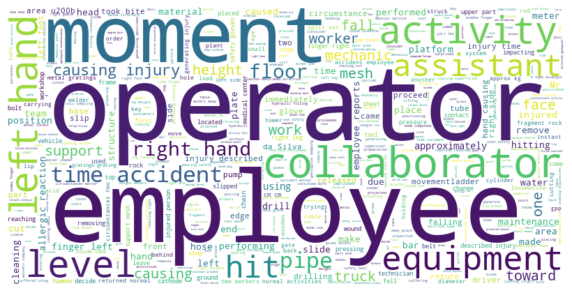

In [72]:
stopwords = STOPWORDS


wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(data['Description'].values))


plt.figure( figsize=(10,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


These are the most frequent words in the new upsampled dataset.

Performed Bigram,trigrams as a part of data pre processing.

In [73]:
get_bigrams=[]
for input_list in questionText_nostops:
  output_list=[]
  for index in range(len(input_list)):
    try:
      output_string = input_list[index]+ "_" + input_list[index+1]
      output_list.append(output_string)
    except IndexError: 
      pass
  get_bigrams.append(output_list)
print(get_bigrams)

[['remove_drill', 'drill_rod', 'rod_jumbo', 'jumbo_08', '08_maintenance', 'maintenance_supervisor', 'supervisor_proceed', 'proceed_loosen', 'loosen_support', 'support_intermediate', 'intermediate_centralizer', 'centralizer_facilitate', 'facilitate_removal', 'removal_see', 'see_mechanic', 'mechanic_support', 'support_one', 'one_end', 'end_drill', 'drill_equipment', 'equipment_pull', 'pull_hand', 'hand_bar', 'bar_accelerate', 'accelerate_removal', 'removal_moment', 'moment_bar', 'bar_slide', 'slide_point', 'point_support', 'support_tighten', 'tighten_finger', 'finger_mechanic', 'mechanic_drill', 'drill_bar', 'bar_beam', 'beam_jumbo'], ['activation_sodium', 'sodium_sulphide', 'sulphide_pump', 'pump_pip', 'pip_uncouple', 'uncouple_sulfide', 'sulfide_solution', 'solution_design', 'design_area', 'area_reach', 'reach_maid', 'maid_immediately', 'immediately_make', 'make_use', 'use_emergency', 'emergency_shower', 'shower_direct', 'direct_ambulatory', 'ambulatory_doctor', 'doctor_late', 'late_ho

In [74]:
get_trigrams=[]
for input_list in questionText_nostops:
  output_list=[]
  for index in range(len(input_list)):
    try:
      output_string = input_list[index]+ "_" + input_list[index+1]+"_"+ input_list[index+2]
      output_list.append(output_string)
    except IndexError: 
      pass
  get_trigrams.append(output_list)
print(get_trigrams)

[['remove_drill_rod', 'drill_rod_jumbo', 'rod_jumbo_08', 'jumbo_08_maintenance', '08_maintenance_supervisor', 'maintenance_supervisor_proceed', 'supervisor_proceed_loosen', 'proceed_loosen_support', 'loosen_support_intermediate', 'support_intermediate_centralizer', 'intermediate_centralizer_facilitate', 'centralizer_facilitate_removal', 'facilitate_removal_see', 'removal_see_mechanic', 'see_mechanic_support', 'mechanic_support_one', 'support_one_end', 'one_end_drill', 'end_drill_equipment', 'drill_equipment_pull', 'equipment_pull_hand', 'pull_hand_bar', 'hand_bar_accelerate', 'bar_accelerate_removal', 'accelerate_removal_moment', 'removal_moment_bar', 'moment_bar_slide', 'bar_slide_point', 'slide_point_support', 'point_support_tighten', 'support_tighten_finger', 'tighten_finger_mechanic', 'finger_mechanic_drill', 'mechanic_drill_bar', 'drill_bar_beam', 'bar_beam_jumbo'], ['activation_sodium_sulphide', 'sodium_sulphide_pump', 'sulphide_pump_pip', 'pump_pip_uncouple', 'pip_uncouple_sulfi

Finally, with the tokens available for all samples, it is time to create the word-index dictionary for changing the data to numerical values. To do this, Tensorflow's tokenizer class will be used.

In [76]:
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts( questionText_nostops ) 
tokenized_questions = tokenizer.texts_to_sequences( questionText_nostops ) 
print('Sample tokenized: {}'.format(tokenized_questions[0]))
print('==================================================================================================================\n')

    
length_list = list()
for token_seq in tokenized_questions:
    length_list.append( len( token_seq ))
max_input_length = np.array( length_list ).max()
print( 'Questions max length is {} words'.format( max_input_length ))
print('==================================================================================================================\n')

padded_questions = preprocessing.sequence.pad_sequences( tokenized_questions , maxlen=max_input_length , padding='post' )
input_data = np.array( padded_questions )
print( 'Input data shape -> {}\n'.format( input_data.shape ))
print('Input data sample->\n {}'.format(input_data[0]))
print('==================================================================================================================\n')

question_word_dict = tokenizer.word_index
num_question_tokens = len( question_word_dict )+1
print( 'Number of Question tokens = {}\n'.format( num_question_tokens))
print('Dictionary: {}'.format(question_word_dict))

Sample tokenized: [27, 56, 175, 362, 1222, 105, 388, 88, 363, 34, 827, 1608, 1609, 197, 364, 53, 34, 19, 99, 56, 17, 152, 3, 162, 1610, 197, 9, 162, 114, 68, 34, 984, 25, 53, 56, 162, 317, 362]

Questions max length is 99 words

Input data shape -> (504, 99)

Input data sample->
 [  27   56  175  362 1222  105  388   88  363   34  827 1608 1609  197
  364   53   34   19   99   56   17  152    3  162 1610  197    9  162
  114   68   34  984   25   53   56  162  317  362    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]

Number of Question tokens = 2604

Dictionary: {'leave': 1, 'cause': 2, 'hand': 3, 'employee': 4, 'right': 5, 'operator': 6, 'activity': 7, 'injury': 8, 'moment': 9, 'time': 10, 'worker': 11, 'work': 12, 'hit': 13, 

Finally, with the input data ready with the numerical token indices, it is time to split the dataset into training and testing sets.

Spliting the dataset

In [77]:
x_train, x_test, y_train, y_test = train_test_split(input_data, targetdf, test_size = 0.3, random_state=2)

In [78]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(352, 99) (152, 99)
(352, 5) (152, 5)


#Machine learning classifiers

In Machine learning models target must be in a singlelabel.

In [79]:
Y = data['Potential Accident Level']
print(Y.shape)

(504,)


In [80]:
x_train, x_test, y_train_ML, y_test_ML = train_test_split(input_data, Y, test_size = 0.3, random_state=2)

In [81]:
print(x_train.shape, x_test.shape)
print(y_train_ML.shape, y_test_ML.shape)

(352, 99) (152, 99)
(352,) (152,)


In [82]:
x_train

array([[   4,   18,  623, ...,    0,    0,    0],
       [   4,  103,   35, ...,    0,    0,    0],
       [ 243,  213,  329, ...,    0,    0,    0],
       ...,
       [  49, 1598, 1599, ...,    0,    0,    0],
       [  16,  103,   12, ...,    0,    0,    0],
       [ 238,  666,  781, ...,    0,    0,    0]], dtype=int32)

#Randomforest classifier

In [83]:
rfclassifier = RandomForestClassifier(n_estimators = 50)
rfclassifier.fit(x_train, y_train_ML)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
y_predict_rf= rfclassifier.predict(x_test)
y_predict_rf

array(['IV', 'I', 'III', 'III', 'I', 'III', 'V', 'I', 'I', 'IV', 'II',
       'IV', 'III', 'IV', 'IV', 'V', 'III', 'I', 'IV', 'I', 'V', 'II',
       'IV', 'V', 'III', 'IV', 'III', 'III', 'IV', 'IV', 'I', 'IV', 'I',
       'IV', 'IV', 'IV', 'I', 'I', 'III', 'IV', 'IV', 'II', 'III', 'I',
       'V', 'I', 'III', 'II', 'IV', 'IV', 'I', 'V', 'V', 'V', 'II', 'IV',
       'I', 'IV', 'IV', 'V', 'V', 'II', 'IV', 'II', 'V', 'II', 'III', 'V',
       'IV', 'IV', 'II', 'IV', 'IV', 'III', 'IV', 'IV', 'IV', 'IV', 'III',
       'IV', 'I', 'III', 'IV', 'V', 'I', 'III', 'II', 'IV', 'III', 'I',
       'II', 'III', 'IV', 'III', 'II', 'IV', 'IV', 'IV', 'IV', 'V', 'II',
       'IV', 'III', 'II', 'V', 'IV', 'IV', 'V', 'I', 'I', 'IV', 'II',
       'IV', 'III', 'IV', 'V', 'I', 'V', 'III', 'II', 'III', 'IV', 'IV',
       'V', 'IV', 'IV', 'V', 'V', 'III', 'V', 'IV', 'IV', 'IV', 'V', 'IV',
       'IV', 'IV', 'V', 'IV', 'IV', 'III', 'III', 'IV', 'III', 'IV', 'II',
       'IV', 'IV', 'V', 'III', 'I', 'I'], dtype=ob

In [85]:
Accuracy_rf = accuracy_score(y_test_ML,y_predict_rf)
print("Rf model Accuracy%:",Accuracy_rf)
cm_rf = metrics.confusion_matrix(y_test_ML,y_predict_rf)
cm_rf

Rf model Accuracy%: 0.5723684210526315


array([[21,  0,  2,  0,  0],
       [ 1,  8,  9, 16,  2],
       [ 0,  5, 14, 14,  1],
       [ 0,  4,  3, 27,  5],
       [ 0,  0,  0,  3, 17]])

56% with basic upsampling 

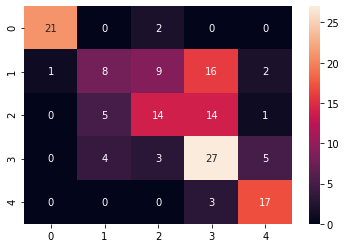

In [86]:
df_cm_rf = pd.DataFrame(cm_rf)
sns.heatmap(df_cm_rf,annot=True)

In [87]:
report= classification_report(y_test_ML,y_predict_rf)
print(report)

              precision    recall  f1-score   support

           I       0.95      0.91      0.93        23
          II       0.47      0.22      0.30        36
         III       0.50      0.41      0.45        34
          IV       0.45      0.69      0.55        39
           V       0.68      0.85      0.76        20

    accuracy                           0.57       152
   macro avg       0.61      0.62      0.60       152
weighted avg       0.57      0.57      0.55       152



In [88]:
result = pd.DataFrame({'Model': ['RandomForestClassifier'],'Accuracy':[Accuracy_rf]})


#Support Vector Classifier

In [89]:
#using support vector classifier
svc = svm.SVC(gamma=0.025,C=1)
svc.fit(x_train,y_train_ML)
y_predict_svc = svc.predict(x_test)
y_predict_svc

array(['IV', 'I', 'IV', 'IV', 'IV', 'IV', 'IV', 'I', 'I', 'IV', 'IV',
       'IV', 'IV', 'IV', 'IV', 'V', 'IV', 'I', 'IV', 'I', 'IV', 'IV',
       'IV', 'V', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'I', 'IV', 'I',
       'IV', 'IV', 'IV', 'I', 'I', 'IV', 'IV', 'IV', 'IV', 'IV', 'I',
       'IV', 'I', 'IV', 'IV', 'IV', 'IV', 'I', 'V', 'V', 'IV', 'IV', 'IV',
       'I', 'IV', 'IV', 'V', 'IV', 'IV', 'IV', 'IV', 'V', 'IV', 'IV', 'V',
       'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV',
       'IV', 'I', 'IV', 'IV', 'V', 'I', 'IV', 'IV', 'IV', 'IV', 'I', 'IV',
       'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'V', 'IV', 'IV',
       'IV', 'IV', 'IV', 'IV', 'IV', 'V', 'I', 'I', 'IV', 'IV', 'IV',
       'IV', 'IV', 'V', 'I', 'V', 'IV', 'IV', 'IV', 'IV', 'IV', 'V', 'IV',
       'IV', 'V', 'IV', 'IV', 'V', 'IV', 'IV', 'IV', 'V', 'IV', 'IV',
       'IV', 'V', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV',
       'IV', 'V', 'IV', 'I', 'I'], dtype=object)

In [90]:
Accuracy_svc = accuracy_score(y_test_ML,y_predict_svc)
print("SVC model Accuracy%:",Accuracy_svc)
cm_svc = metrics.confusion_matrix(y_test_ML,y_predict_svc)
cm_svc

SVC model Accuracy%: 0.5


array([[21,  0,  0,  2,  0],
       [ 0,  0,  0, 36,  0],
       [ 0,  0,  0, 34,  0],
       [ 0,  0,  0, 38,  1],
       [ 0,  0,  0,  3, 17]])

50% with basic upsampling 

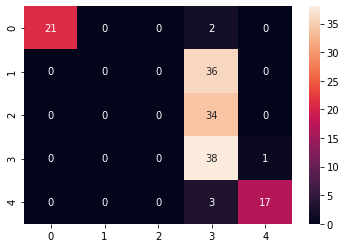

In [91]:
df_cm_svc= pd.DataFrame(cm_svc)
sns.heatmap(df_cm_svc,annot=True)

In [92]:
report= classification_report(y_test_ML,y_predict_svc)
print(report)

              precision    recall  f1-score   support

           I       1.00      0.91      0.95        23
          II       0.00      0.00      0.00        36
         III       0.00      0.00      0.00        34
          IV       0.34      0.97      0.50        39
           V       0.94      0.85      0.89        20

    accuracy                           0.50       152
   macro avg       0.46      0.55      0.47       152
weighted avg       0.36      0.50      0.39       152



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
result.loc[1] = ['Support Vector Classifier',Accuracy_svc]


#DecisionTree Classifier

In [94]:
DTC = DecisionTreeClassifier(criterion='gini')
DTC.fit(x_train,y_train_ML)
y_predict_DTC = DTC.predict(x_test)
y_predict_DTC

array(['IV', 'I', 'III', 'II', 'I', 'II', 'I', 'I', 'I', 'IV', 'III',
       'III', 'II', 'II', 'II', 'V', 'I', 'I', 'IV', 'I', 'IV', 'II',
       'III', 'V', 'IV', 'IV', 'III', 'IV', 'IV', 'IV', 'I', 'IV', 'I',
       'IV', 'IV', 'IV', 'I', 'I', 'III', 'IV', 'IV', 'III', 'III', 'I',
       'IV', 'I', 'IV', 'II', 'III', 'IV', 'I', 'V', 'V', 'V', 'V', 'II',
       'I', 'IV', 'III', 'V', 'I', 'IV', 'IV', 'V', 'V', 'III', 'III',
       'V', 'IV', 'II', 'III', 'V', 'II', 'IV', 'IV', 'IV', 'II', 'IV',
       'IV', 'II', 'I', 'II', 'II', 'V', 'I', 'IV', 'III', 'I', 'IV', 'I',
       'III', 'IV', 'II', 'III', 'II', 'II', 'IV', 'IV', 'IV', 'V', 'IV',
       'II', 'II', 'III', 'V', 'I', 'III', 'V', 'I', 'I', 'V', 'IV', 'IV',
       'III', 'I', 'V', 'I', 'V', 'IV', 'II', 'IV', 'IV', 'IV', 'V',
       'III', 'II', 'V', 'I', 'III', 'V', 'IV', 'IV', 'III', 'V', 'III',
       'IV', 'V', 'V', 'III', 'IV', 'II', 'II', 'III', 'III', 'II', 'III',
       'II', 'IV', 'V', 'IV', 'I', 'I'], dtype=object)

In [95]:
acc_DTC = accuracy_score(y_test_ML,y_predict_DTC)
print("Accuracy:",acc_DTC)

cm_DTC = metrics.confusion_matrix(y_test_ML,y_predict_DTC)
cm_DTC

Accuracy: 0.4605263157894737


array([[21,  1,  1,  0,  0],
       [ 3,  7, 10, 15,  1],
       [ 1,  9,  9, 12,  3],
       [ 4,  8,  7, 16,  4],
       [ 0,  0,  0,  3, 17]])

45% with Basic upsampling 

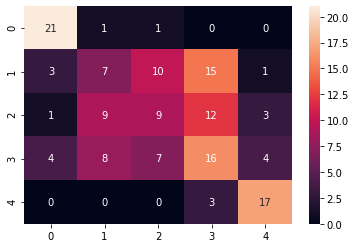

In [96]:
df_cm_DTC= pd.DataFrame(cm_DTC)
sns.heatmap(df_cm_DTC,annot=True)

In [97]:
report= classification_report(y_test_ML,y_predict_DTC)
print(report)

              precision    recall  f1-score   support

           I       0.72      0.91      0.81        23
          II       0.28      0.19      0.23        36
         III       0.33      0.26      0.30        34
          IV       0.35      0.41      0.38        39
           V       0.68      0.85      0.76        20

    accuracy                           0.46       152
   macro avg       0.47      0.53      0.49       152
weighted avg       0.43      0.46      0.44       152



In [98]:
result.loc[2]= ['DecisionTree Classifier',acc_DTC]

# MultinomialNB

In [99]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train_ML)

y_pred_MNB = classifier.predict(x_test)
y_pred_MNB

array(['II', 'I', 'III', 'II', 'I', 'III', 'V', 'I', 'II', 'II', 'II',
       'II', 'III', 'II', 'IV', 'I', 'III', 'I', 'I', 'I', 'IV', 'II',
       'V', 'III', 'III', 'I', 'II', 'III', 'IV', 'III', 'I', 'I', 'I',
       'III', 'II', 'IV', 'I', 'II', 'II', 'II', 'III', 'II', 'II', 'III',
       'V', 'II', 'II', 'III', 'I', 'IV', 'I', 'II', 'IV', 'V', 'III',
       'IV', 'I', 'III', 'III', 'II', 'V', 'II', 'V', 'II', 'III', 'III',
       'III', 'II', 'II', 'III', 'II', 'II', 'IV', 'II', 'II', 'II', 'II',
       'I', 'II', 'II', 'I', 'III', 'II', 'V', 'III', 'II', 'III', 'III',
       'II', 'III', 'III', 'II', 'I', 'III', 'II', 'III', 'II', 'I', 'II',
       'III', 'II', 'V', 'II', 'II', 'V', 'IV', 'I', 'II', 'II', 'III',
       'II', 'II', 'II', 'II', 'IV', 'II', 'III', 'I', 'III', 'II', 'III',
       'II', 'II', 'I', 'IV', 'IV', 'I', 'III', 'II', 'II', 'II', 'I',
       'III', 'II', 'III', 'II', 'III', 'III', 'II', 'I', 'II', 'III',
       'II', 'II', 'IV', 'II', 'II', 'III', 'III', 'I

In [ ]:
acc_MNB = accuracy_score(y_test_ML,y_pred_MNB)
print(" MNB Accuracy:",acc_MNB)

cm_MNB = metrics.confusion_matrix(y_test_ML,y_predict_DTC)
cm_MNB

 MNB Accuracy: 0.3157894736842105


array([[22,  0,  0,  0,  1],
       [ 4, 11,  6, 14,  1],
       [ 0,  8, 11, 11,  4],
       [ 3,  8, 13, 13,  2],
       [ 0,  0,  3,  0, 17]])

31 with basic upsampling 

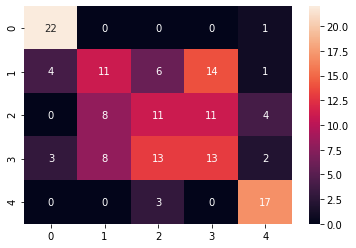

In [ ]:
df_cm_MNB = pd.DataFrame(cm_MNB)
sns.heatmap(df_cm_MNB,annot=True)

In [ ]:
report= classification_report(y_test_ML,y_pred_MNB)
print(report)

              precision    recall  f1-score   support

           I       0.43      0.57      0.49        23
          II       0.24      0.44      0.31        36
         III       0.18      0.18      0.18        34
          IV       0.86      0.31      0.45        39
           V       0.14      0.05      0.07        20

    accuracy                           0.32       152
   macro avg       0.37      0.31      0.30       152
weighted avg       0.40      0.32      0.31       152



In [ ]:
result.loc[3]= ['Multinominal NB',acc_MNB]
result

,Model,Accuracy
0,RandomForestClassifier,0.605263
1,Support Vector Classifier,0.500000
2,DecisionTree Classifier,0.486842
3,Multinominal NB,0.315789


Observations: In Machine learning Classification Models Recall and F1 scores are too low, trying few of deep learning models to get good accuracy and reduce the loss.

#Convolation neural Network 

In [100]:
input_shape = (4,10,128)
input_shape[1:]

(10, 128)

In [101]:
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from tensorflow import keras

In [102]:
from keras.layers import Embedding
# the dimension of vectors to be used
EMBEDDING_DIM = 100
# filter sizes of the different conv layers 
filter_sizes = [3,4,5]
num_filters = 512
embedding_dim = 100

In [103]:
embedding_layer = Embedding(len(question_word_dict) + 1,EMBEDDING_DIM,input_length=max_input_length,
                            trainable=False)#weights=[embedding_matrix],
inputs = Input(shape=(max_input_length,), dtype='int32')
embedding = embedding_layer(inputs)
print(embedding.shape)

reshape = Reshape((max_input_length,EMBEDDING_DIM,1))(embedding)
print(reshape.shape)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)


maxpool_0 = MaxPool2D(pool_size=(max_input_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(max_input_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(max_input_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)


concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(0.2)(flatten)
output = Dense(units=5, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy', 'Precision', 'Recall'])

(None, 99, 100)
(None, 99, 100, 1)


In [104]:
reshape = Reshape((max_input_length,EMBEDDING_DIM,1))(embedding)
print(reshape.shape)

(None, 99, 100, 1)


In [105]:
conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)


maxpool_0 = MaxPool2D(pool_size=(max_input_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(max_input_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(max_input_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)


concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(0.2)(flatten)
output = Dense(units=5, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

In [106]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy', 'Precision', 'Recall'])

In [107]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 99)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 99, 100)      260400      input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 99, 100, 1)   0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 97, 1, 512)   154112      reshape_1[0][0]                  
____________________________________________________________________________________________

In [108]:
CNN_model_history = model.fit(x_train, y_train, batch_size=35, epochs=20, verbose=1,validation_split=0.15)

Epoch 1/50
11/11 [==============================] - 4s 276ms/step - loss: 1.6467 - accuracy: 0.2295 - precision: 0.3097 - recall: 0.0358 - val_loss: 1.4926 - val_accuracy: 0.3553 - val_precision: 1.0000 - val_recall: 0.0592
Epoch 2/50
11/11 [==============================] - 2s 201ms/step - loss: 1.0737 - accuracy: 0.6108 - precision: 0.9976 - recall: 0.2797 - val_loss: 1.2377 - val_accuracy: 0.5197 - val_precision: 0.9744 - val_recall: 0.2500
Epoch 3/50
11/11 [==============================] - 2s 201ms/step - loss: 0.5477 - accuracy: 0.9050 - precision: 1.0000 - recall: 0.7360 - val_loss: 1.1745 - val_accuracy: 0.4803 - val_precision: 0.5086 - val_recall: 0.3882
Epoch 4/50
11/11 [==============================] - 2s 207ms/step - loss: 0.3058 - accuracy: 0.9353 - precision: 0.9674 - recall: 0.8864 - val_loss: 1.0432 - val_accuracy: 0.5395 - val_precision: 0.7253 - val_recall: 0.4342
Epoch 5/50
11/11 [==============================] - 2s 205ms/step - loss: 0.0714 - accuracy: 1.0000 - pr

In [109]:
predict_CNN = model.predict(x_test)
predict_CNN.shape

(152, 5)

dataframe = predict_CNN.reshape(-1,1)
print(dataframe.shape)
df = pd.DataFrame(dataframe,columns=["classes"])
df

In [110]:
pre_test=np.argmax(np.array(predict_CNN),axis=-1)
print(pre_test)
df = pd.DataFrame(pre_test,columns=["classes"])
print(df)

[3 0 3 2 2 2 3 0 0 2 2 3 3 3 3 4 3 0 2 0 3 2 3 4 2 3 2 2 3 3 0 3 0 3 3 3 0
 0 2 2 3 1 2 0 3 0 3 3 3 3 0 4 4 3 3 3 0 2 3 4 3 3 3 3 4 3 1 4 3 2 3 3 3 2
 2 3 3 3 2 3 0 3 3 4 0 3 2 1 3 0 3 2 3 1 3 3 3 3 2 4 3 3 2 3 3 1 3 4 0 0 0
 2 0 3 3 4 0 4 3 2 2 3 3 4 3 3 4 3 3 4 3 3 2 4 3 2 2 4 3 3 3 1 3 2 1 1 3 3
 4 3 0 0]
     classes
0          3
1          0
2          3
3          2
4          2
..       ...
147        3
148        4
149        3
150        0
151        0

[152 rows x 1 columns]


In [113]:
CNN_history_df = pd.DataFrame(CNN_model_history.history)
CNN_history_df['f1_score'] = (2 * CNN_history_df['precision']*CNN_history_df['recall'])/(CNN_history_df['precision']+CNN_history_df['recall'])
CNN_history_df['val_f1_score'] = (2 * CNN_history_df['val_precision']*CNN_history_df['val_recall'])/(CNN_history_df['val_precision']+CNN_history_df['val_recall'])

In [114]:
CNN_history_df

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall,f1_score,val_f1_score
0,1.594386,0.278409,0.433333,0.036932,1.492594,0.355263,1.000000,0.059211,0.068063,0.111801
1,0.966078,0.698864,0.990566,0.298295,1.237703,0.519737,0.974359,0.250000,0.458515,0.397906
2,0.505497,0.940341,1.000000,0.764205,1.174492,0.480263,0.508621,0.388158,0.866345,0.440299
3,0.251410,0.960227,0.981595,0.909091,1.043171,0.539474,0.725275,0.434211,0.943953,0.543210
4,0.069147,1.000000,1.000000,1.000000,0.922835,0.598684,0.690722,0.440789,1.000000,0.538153
5,0.025056,1.000000,1.000000,1.000000,1.046983,0.559211,0.621849,0.486842,1.000000,0.546125
6,0.014569,1.000000,1.000000,1.000000,1.059847,0.565789,0.632479,0.486842,1.000000,0.550186
7,0.007978,1.000000,1.000000,1.000000,1.026005,0.565789,0.633929,0.467105,1.000000,0.537879
8,0.005324,1.000000,1.000000,1.000000,1.030674,0.572368,0.619469,0.460526,1.000000,0.528302
9,0.004103,1.000000,1.000000,1.000000,1.047193,0.578947,0.632479,0.486842,1.000000,0.550186


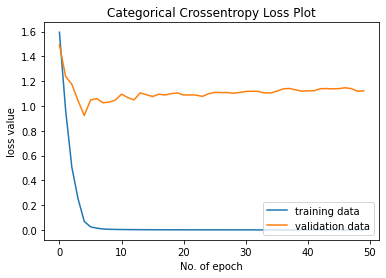

In [115]:
plt.plot(CNN_history_df['loss'], label='training data')
plt.plot(CNN_history_df['val_loss'], label='validation data')
plt.title('Categorical Crossentropy Loss Plot')
plt.ylabel('loss value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")
plt.show()

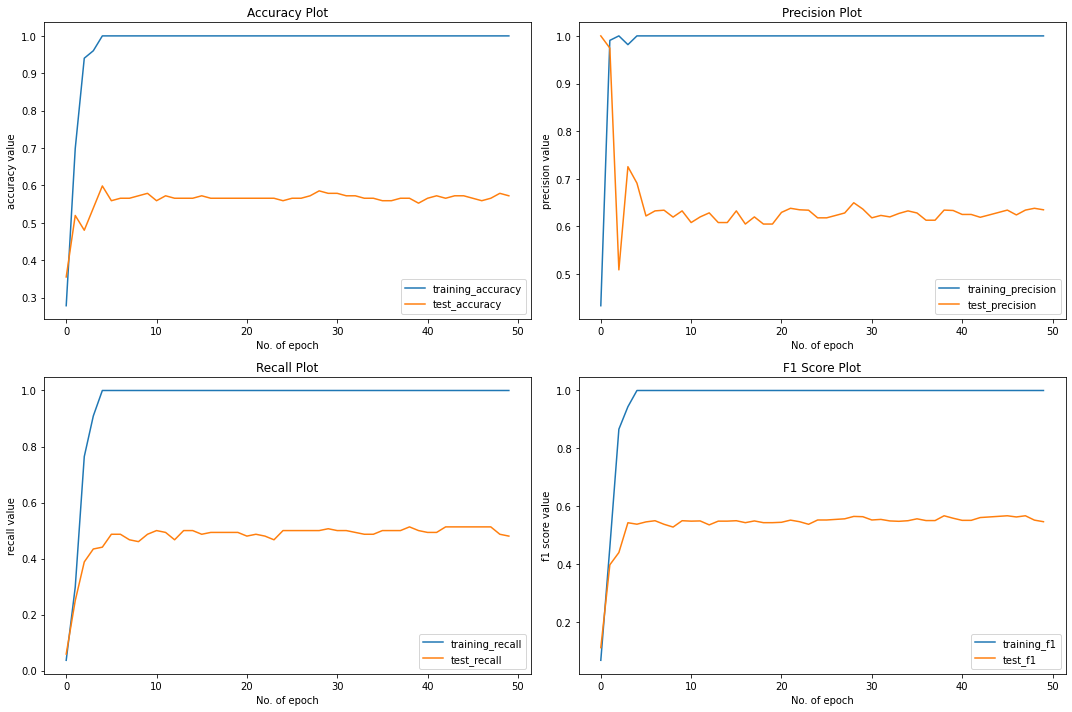

In [116]:
plt.subplots(figsize=(15,10))
ax = plt.subplot(2,2,1)
plt.plot(CNN_history_df['accuracy'], label='training_accuracy')
plt.plot(CNN_history_df['val_accuracy'], label='test_accuracy')
plt.title('Accuracy Plot')
plt.ylabel('accuracy value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,2)
plt.plot(CNN_history_df['precision'], label='training_precision')
plt.plot(CNN_history_df['val_precision'], label='test_precision')
plt.title('Precision Plot')
plt.ylabel('precision value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,3)
plt.plot(CNN_history_df['recall'], label='training_recall')
plt.plot(CNN_history_df['val_recall'], label='test_recall')
plt.title('Recall Plot')
plt.ylabel('recall value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,4)
plt.plot(CNN_history_df['f1_score'], label='training_f1')
plt.plot(CNN_history_df['val_f1_score'], label='test_f1')
plt.title('F1 Score Plot')
plt.ylabel('f1 score value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#CNN with Batch normalization

In [120]:
from tensorflow.keras import regularizers
from keras.layers.normalization import BatchNormalization


In [122]:
#CNN with Batch normalization
max_features = 20000
embedding_dim=200
seaquence_length = 150


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=seaquence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               


model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(tf.keras.layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(5, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))





In [123]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 200)          4000200   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 148, 128)          76928     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [124]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy', 'Precision', 'Recall'])

In [129]:
Batch_CNN_model_history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1,validation_split=0.15)

Epoch 1/50
10/10 [==============================] - 1s 95ms/step - loss: 0.5824 - accuracy: 1.0000 - precision: 0.5599 - recall: 1.0000 - val_loss: 2.9688 - val_accuracy: 0.4151 - val_precision: 0.3333 - val_recall: 0.7358
Epoch 2/50
10/10 [==============================] - 1s 90ms/step - loss: 0.5317 - accuracy: 1.0000 - precision: 0.5695 - recall: 1.0000 - val_loss: 2.8969 - val_accuracy: 0.4151 - val_precision: 0.3228 - val_recall: 0.7736
Epoch 3/50
10/10 [==============================] - 1s 88ms/step - loss: 0.4857 - accuracy: 1.0000 - precision: 0.5772 - recall: 1.0000 - val_loss: 2.8884 - val_accuracy: 0.4340 - val_precision: 0.2963 - val_recall: 0.7547
Epoch 4/50
10/10 [==============================] - 1s 87ms/step - loss: 0.4609 - accuracy: 0.9933 - precision: 0.5840 - recall: 1.0000 - val_loss: 2.9902 - val_accuracy: 0.4906 - val_precision: 0.3022 - val_recall: 0.7925
Epoch 5/50
10/10 [==============================] - 1s 88ms/step - loss: 0.4699 - accuracy: 0.9799 - precisi

In [130]:
Batch_CNN_model_history_df = pd.DataFrame(Batch_CNN_model_history.history)
Batch_CNN_model_history_df['f1_score'] = (2 * Batch_CNN_model_history_df['precision']*Batch_CNN_model_history_df['recall'])/(Batch_CNN_model_history_df['precision']+Batch_CNN_model_history_df['recall'])
Batch_CNN_model_history_df['val_f1_score'] = (2 * Batch_CNN_model_history_df['val_precision']*Batch_CNN_model_history_df['val_recall'])/(Batch_CNN_model_history_df['val_precision']+Batch_CNN_model_history_df['val_recall'])

In [131]:
Batch_CNN_model_history

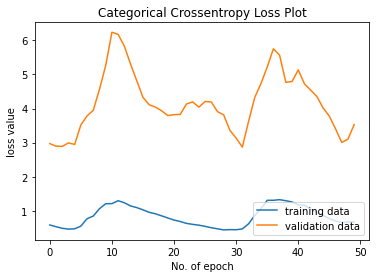

In [133]:
plt.plot(Batch_CNN_model_history_df['loss'], label='training data')
plt.plot(Batch_CNN_model_history_df['val_loss'], label='validation data')
plt.title('Categorical Crossentropy Loss Plot')
plt.ylabel('loss value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")
plt.show()

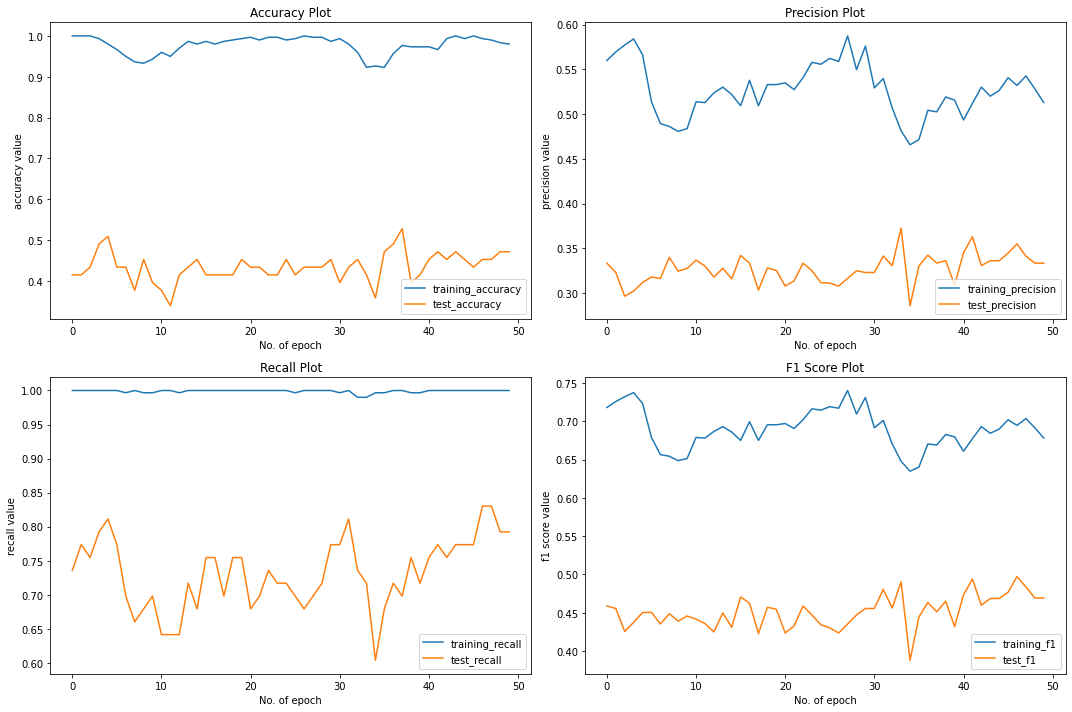

In [134]:
plt.subplots(figsize=(15,10))
ax = plt.subplot(2,2,1)
plt.plot(Batch_CNN_model_history_df['accuracy'], label='training_accuracy')
plt.plot(Batch_CNN_model_history_df['val_accuracy'], label='test_accuracy')
plt.title('Accuracy Plot')
plt.ylabel('accuracy value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,2)
plt.plot(Batch_CNN_model_history_df['precision'], label='training_precision')
plt.plot(Batch_CNN_model_history_df['val_precision'], label='test_precision')
plt.title('Precision Plot')
plt.ylabel('precision value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,3)
plt.plot(Batch_CNN_model_history_df['recall'], label='training_recall')
plt.plot(Batch_CNN_model_history_df['val_recall'], label='test_recall')
plt.title('Recall Plot')
plt.ylabel('recall value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,4)
plt.plot(Batch_CNN_model_history_df['f1_score'], label='training_f1')
plt.plot(Batch_CNN_model_history_df['val_f1_score'], label='test_f1')
plt.title('F1 Score Plot')
plt.ylabel('f1 score value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Observations: More fluctuations on accuracy, loss results. Not good to take these types of models into production, implementing another state of the art algorithms.

# Model Building - LSTM

Finally, in the below cell, the bi-directional LSTM model is defined.

In [145]:
inputs = tf.keras.layers.Input(shape=(None,))
embedding = tf.keras.layers.Embedding(num_question_tokens, 100, mask_zero=True)(inputs)
lstm_outputs = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_state=False,recurrent_dropout=0.1)) (embedding)
dense_outputs = tf.keras.layers.Dense(100, activation=tf.keras.activations.relu) (lstm_outputs)
outputs = tf.keras.layers.Dense(5, activation=tf.keras.activations.softmax) (dense_outputs)

LSTM_model = tf.keras.models.Model(inputs, outputs)
LSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [146]:
LSTM_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 100)         260400    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 505       
Total params: 441,805
Trainable params: 441,805
Non-trainable params: 0
_________________________________________________________________


The summary of the model is displayed above which shows a total of xxxx parameters. In below cell, the compiled model is trained upto xx epochs.

In [147]:
#batch size to 32 and epochs to 50
history = LSTM_model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1,validation_split=0.15)

Epoch 1/50
10/10 [==============================] - 11s 529ms/step - loss: 1.6062 - accuracy: 0.2614 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5993 - val_accuracy: 0.2453 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 4s 415ms/step - loss: 1.5598 - accuracy: 0.2765 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.6151 - val_accuracy: 0.2453 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 4s 418ms/step - loss: 1.4427 - accuracy: 0.3195 - precision: 1.0000 - recall: 0.0194 - val_loss: 1.6106 - val_accuracy: 0.2642 - val_precision: 0.4000 - val_recall: 0.0755
Epoch 4/50
10/10 [==============================] - 4s 426ms/step - loss: 1.0833 - accuracy: 0.5130 - precision: 0.7552 - recall: 0.3386 - val_loss: 1.4879 - val_accuracy: 0.4340 - val_precision: 0.5000 - val_recall: 0.2453
Epoch 5/50
10/10 [==============================] - 4s 426ms/step - los

In [148]:
history_df = pd.DataFrame(history.history)
history_df['f1_score'] = (2 * history_df['precision']*history_df['recall'])/(history_df['precision']+history_df['recall'])
history_df['val_f1_score'] = (2 * history_df['val_precision']*history_df['val_recall'])/(history_df['val_precision']+history_df['val_recall'])

In [149]:
history_df

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall,f1_score,val_f1_score
0,1.602111,0.287625,0.000000,0.000000,1.599330,0.245283,0.000000,0.000000,NaN,NaN
1,1.538484,0.304348,0.000000,0.000000,1.615133,0.245283,0.000000,0.000000,NaN,NaN
2,1.407172,0.341137,1.000000,0.013378,1.610649,0.264151,0.400000,0.075472,0.026403,0.126984
3,1.018618,0.551839,0.795455,0.351171,1.487890,0.433962,0.500000,0.245283,0.487239,0.329114
4,0.711705,0.732441,0.932203,0.551839,1.426849,0.433962,0.560000,0.264151,0.693277,0.358974
5,0.506209,0.846154,0.936170,0.735786,2.201325,0.490566,0.560976,0.433962,0.823970,0.489362
6,0.334596,0.886288,0.968504,0.822742,2.244231,0.433962,0.511111,0.433962,0.889693,0.469388
7,0.263739,0.936455,0.972441,0.826087,2.070725,0.433962,0.500000,0.433962,0.893309,0.464646
8,0.163116,0.979933,0.989324,0.929766,2.568313,0.471698,0.533333,0.452830,0.958621,0.489796
9,0.064011,0.996656,1.000000,0.993311,2.797474,0.471698,0.500000,0.452830,0.996644,0.475248


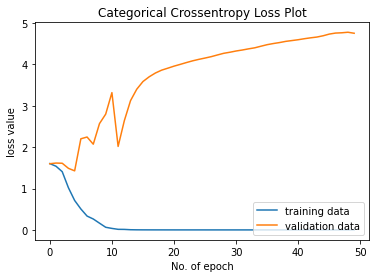

In [150]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Categorical Crossentropy Loss Plot')
plt.ylabel('loss value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")
plt.show()

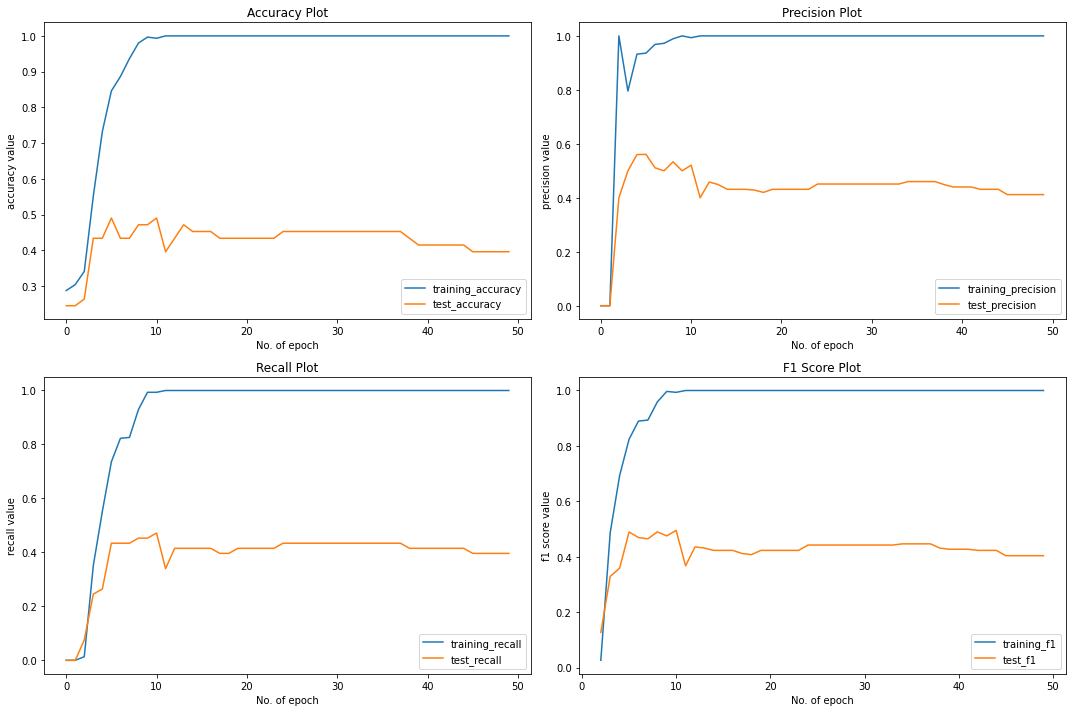

In [151]:
plt.subplots(figsize=(15,10))
ax = plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.title('Accuracy Plot')
plt.ylabel('accuracy value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,2)
plt.plot(history.history['precision'], label='training_precision')
plt.plot(history.history['val_precision'], label='test_precision')
plt.title('Precision Plot')
plt.ylabel('precision value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,3)
plt.plot(history.history['recall'], label='training_recall')
plt.plot(history.history['val_recall'], label='test_recall')
plt.title('Recall Plot')
plt.ylabel('recall value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

ax = plt.subplot(2,2,4)
plt.plot(history_df['f1_score'], label='training_f1')
plt.plot(history_df['val_f1_score'], label='test_f1')
plt.title('F1 Score Plot')
plt.ylabel('f1 score value')
plt.xlabel('No. of epoch')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Below, a predict function is defined that will take as input natural language text and try to classify it into the Potential Accident level defined from the dataset. 

#New Up sample dataset

In [168]:
data.columns = [c.replace(' ','_') for c in data.columns]

In [169]:
data.head()

,Potential_Accident_Level,Description
0,IV,While removing the drill rod of the Jumbo 08 f...
1,IV,During the activation of a sodium sulphide pum...
2,III,In the sub-station MILPO located at level +170...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...
4,I,Being 9:45 am. approximately in the Nv. 1880 C...


In [170]:
data.Potential_Accident_Level.value_counts()

IV     143
III    106
II      95
V       80
I       80
Name: Potential_Accident_Level, dtype: int64

In [171]:
data = data[data.Potential_Accident_Level != 'VI']

In [172]:
data.Potential_Accident_Level.value_counts()

IV     143
III    106
II      95
V       80
I       80
Name: Potential_Accident_Level, dtype: int64

In [183]:

data['ylabeled'] = data['Potential_Accident_Level'].values
le = sklearn.preprocessing.LabelEncoder()
le.fit(data['Potential_Accident_Level'])

data['ylabeled'] = le.transform(data.ylabeled)

In [184]:
data.head(2)

,Potential_Accident_Level,Description,ylabeled
0,IV,While removing the drill rod of the Jumbo 08 f...,3
1,IV,During the activation of a sodium sulphide pum...,3


In [185]:
data.Potential_Accident_Level.value_counts()

IV     143
III    106
II      95
V       80
I       80
Name: Potential_Accident_Level, dtype: int64

In [186]:
class4sample = data[data['ylabeled']== 4].sample(200,random_state=2,replace=True)
class0sample = data[data['ylabeled']== 0].sample(200,random_state=2,replace=True)
class1 = data[data['ylabeled']==1].sample(100,random_state=2,replace=True)
class2 = data[data['ylabeled']==2].sample(200,random_state=2,replace=True)
class3 = data[data['ylabeled']==3].sample(100,random_state=2,replace=True)

In [187]:
data_1 = pd.concat([class4sample,class0sample,class1,class2,class3],axis=0)

In [188]:
data_1.shape

(800, 3)

In [189]:
X_new = data_1.Description

In [190]:
y = data_1.ylabeled

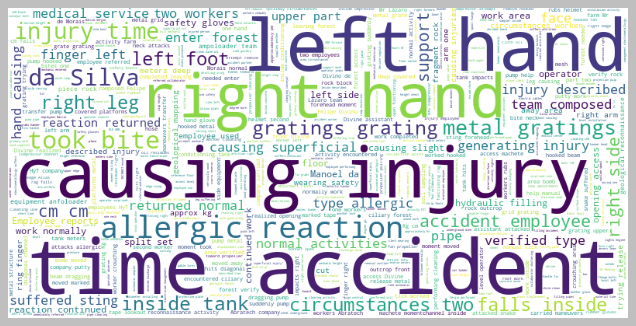

In [246]:
stopwords = STOPWORDS


wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(X_new.values))


plt.figure( figsize=(10,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [191]:
X_train_txt, X_test_txt, y_train, y_test = train_test_split(X_new, y,test_size=0.2, random_state=1)

print("X_train_txt.shape:",X_train_txt.shape)
print("X_test_txt.shape",X_test_txt.shape)
print("y_train.shape:",y_train.shape)
print("y_test shape:",y_test.shape)


X_train_txt.shape: (640,)
X_test_txt.shape (160,)
y_train.shape: (640,)
y_test shape: (160,)


In [194]:
y_train_enc = to_categorical(y_train, 5)
y_test_enc = to_categorical(y_test, 5)

print("y_train_enc.shape",y_train_enc.shape)
print("y_test_enc shape", y_test_enc.shape)

y_train_enc.shape (640, 5)
y_test_enc shape (160, 5)


In [197]:
max_words = 6000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train_txt.values.astype('U'))
sequences = tok.texts_to_sequences(X_train_txt.values.astype('U'))
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [198]:
sequences_matrix.shape


(640, 100)

In [200]:
sequences_test = tok.texts_to_sequences(X_test_txt.values.astype('U'))
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [201]:
sequences_matrix_test.shape


(160, 100)

In [202]:
y_test_2d= y_test.values.reshape(-1,1)
print(type(y_test_2d))
print(y_test_2d.shape)

<class 'numpy.ndarray'>
(160, 1)


#Logistic Regression

In [206]:
logreg = LogisticRegression(C=1e9)
logreg.fit(sequences_matrix,y_train)
y_pred_class_logreg = logreg.predict(sequences_matrix_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [277]:
Acc_lg =metrics.accuracy_score(y_test,y_pred_class_logreg)
f1_score_lg = metrics.f1_score(y_test, y_pred_class_logreg,average=None)

In [207]:
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg,))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg,average=None))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg,average=None))
#print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg))

LogisticReg ACCURACY: 0.875
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         40   0   0   0   0
1          0  13   2   2   0
2          0   0  38   2   1
3          2   6   4  13   1
4          0   0   0   0  36
===> **LogisticReg F1 SCORE [0.97560976 0.72222222 0.89411765 0.60465116 0.97297297]
===> **LogisticReg Recall SCORE [1.         0.76470588 0.92682927 0.5        1.        ]
===> **LogisticReg Precision SCORE [0.95238095 0.68421053 0.86363636 0.76470588 0.94736842]


In [278]:
result = pd.DataFrame({'model':['Logistic Regression'],'Accuracy':[Acc_lg],'F1_score':[f1_score_lg],'Comments':'Accuracy is good,f1 score for all classes are not good'}) 

In [279]:
result

,model,Accuracy,F1_score,Comments
0,Logistic Regression,0.875,"[0.975609756097561, 0.7222222222222222, 0.8941...","Accuracy is good,f1 score for all classes are ..."


#KNN Classifier

In [209]:
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [210]:
error = []
# Calculating error for K values for 5, 13 and 21
for i in range(1,49):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(sequences_matrix, y_train)
    pred_i = knn.predict(sequences_matrix_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

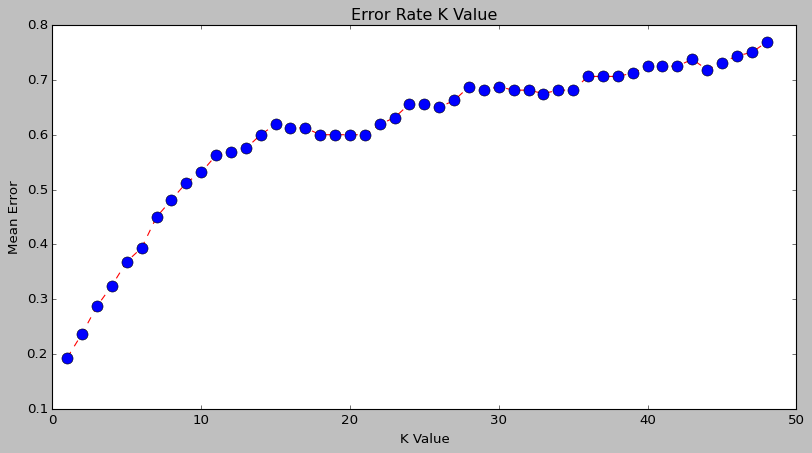

In [211]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1,49), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [212]:
knn = KNeighborsClassifier(n_neighbors=1) #at k=4 got 68%
knn.fit(sequences_matrix,y_train)
y_pred_class_knn = knn.predict(sequences_matrix_test)

In [282]:
acc_knn = metrics.accuracy_score(y_test,y_pred_class_knn)
f1_score_knn= metrics.f1_score(y_test, y_pred_class_knn,average=None)

In [213]:
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn,))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn,average=None))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn,average=None))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn,average=None))
#print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg))

LogisticReg ACCURACY: 0.80625
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2  3   4
ylabeled                   
0         40   0   0  0   0
1          1  11   4  0   1
2          5   0  35  0   1
3          6   1   4  7   8
4          0   0   0  0  36
===> **LogisticReg F1 SCORE [0.86956522 0.75862069 0.83333333 0.42424242 0.87804878]
===> **LogisticReg Recall SCORE [1.         0.64705882 0.85365854 0.26923077 1.        ]
===> **LogisticReg Precision SCORE [0.76923077 0.91666667 0.81395349 1.         0.7826087 ]


In [284]:
result.loc[1]= ['KNN Classifier',acc_knn,f1_score_knn,'Accuracy is 80, class3 f1 score is too less']

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,model,Accuracy,F1_score,Comments
0,Logistic Regression,0.87500,"[0.975609756097561, 0.7222222222222222, 0.8941...","Accuracy is good,f1 score for all classes are ..."
1,KNN Classifier,0.80625,"[0.8695652173913044, 0.7586206896551724, 0.833...","Accuracy is 80, class3 f1 score is too less"


#SVC Classifier

In [242]:

svcclassifier = SVC(random_state=0,kernel='rbf',C=10,probability=True)
svcclassifier.fit(sequences_matrix,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [215]:
svcclassifier.score(sequences_matrix,y_train)


0.9984375

In [216]:
y_pred_svm = svcclassifier.predict(sequences_matrix_test)


In [217]:

print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm,average=None))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm,average=None))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm,average=None))

SVM ACCURACY: 0.875
SVM CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         40   0   0   0   0
1          0  11   5   1   0
2          1   0  39   0   1
3          1   2   8  14   1
4          0   0   0   0  36
===> **SVM F1 SCORE [0.97560976 0.73333333 0.83870968 0.68292683 0.97297297]
===> **SVM Recall SCORE [1.         0.64705882 0.95121951 0.53846154 1.        ]
===> **SVM Precision SCORE [0.95238095 0.84615385 0.75       0.93333333 0.94736842]


In [286]:
acc_svc = metrics.accuracy_score(y_test,y_pred_svm)
f1_score_svc = metrics.f1_score(y_test, y_pred_svm,average=None)

In [287]:
result.loc[2]= ['SVC Classifier',acc_svc,f1_score_svc,'Accuracy is good']

#Multinominal Naive Bais 

In [218]:

nb = MultinomialNB()
nb.fit(sequences_matrix,y_train)
y_pred_class_nb = nb.predict(sequences_matrix_test)

In [288]:
print("Multinominal NB ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb,))
print('MultinominalNB CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **Multinominal NB F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb,average=None))
print("===> **Multinominal NB Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb,average=None))
print("===> **Multinominal NB Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb,average=None))

Multinominal NB ACCURACY: 0.49375
MultinominalNB CLASSIFIER CONFUSTION MATRIX: col_0      0  1   2  3   4
ylabeled                  
0         21  5  11  2   1
1          0  6   7  3   1
2          1  6  26  2   6
3          5  4   5  8   4
4          0  2  11  5  18
===> **Multinominal NB F1 SCORE [0.62686567 0.3        0.51485149 0.34782609 0.54545455]
===> **Multinominal NB Recall SCORE [0.525      0.35294118 0.63414634 0.30769231 0.5       ]
===> **Multinominal NB Precision SCORE [0.77777778 0.26086957 0.43333333 0.4        0.6       ]


In [289]:
acc_mnb = metrics.accuracy_score(y_test,y_pred_class_nb,)
f1_score_mnb = metrics.f1_score(y_test, y_pred_class_nb,average=None)


In [291]:
result.loc[3]= ['Multinominal Naive bais Classifier',acc_mnb,f1_score_mnb,'Accuracy is poor']

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


#DecisionTreeClassifier

In [220]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.7,1:.3}, min_samples_leaf=15)
classifier.fit(sequences_matrix,y_train)
y_pred_tree = classifier.predict(sequences_matrix_test)

In [221]:
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree,average=None))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree,average=None))
#print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree,average=None))

Dtree ACCURACY: 0.65
Dtree CLASSIFIER CONFUSTION MATRIX: col_0      0  1   2  3   4
ylabeled                  
0         33  0   1  4   2
1          2  1  10  1   3
2          5  0  30  2   4
3          4  1  11  5   5
4          0  0   0  1  35
===> **Dtree F1 SCORE [0.78571429 0.10526316 0.64516129 0.25641026 0.82352941]
===> **Dtree Recall SCORE [0.825      0.05882353 0.73170732 0.19230769 0.97222222]
===> **Dtree Precision SCORE [0.75       0.5        0.57692308 0.38461538 0.71428571]


In [292]:
acc_DT = metrics.accuracy_score(y_test,y_pred_tree)
f1_score_DT = metrics.f1_score(y_test, y_pred_tree,average=None)

In [293]:
result.loc[4]= ['DecisionTreeClassifier',acc_DT,f1_score_DT,'Accuracy is poor']

#RandomForestClassifier

In [222]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=100,random_state=0)
rand_classifer.fit(sequences_matrix,y_train)
y_pred_randforest = rand_classifer.predict(sequences_matrix_test)

In [223]:
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest,average=None))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest,average=None))
#print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest,average=None))

RandForest ACCURACY: 0.86875
RandForest CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         40   0   0   0   0
1          0  11   6   0   0
2          2   0  39   0   0
3          2   0  10  13   1
4          0   0   0   0  36
===> **RandForest F1 SCORE [0.95238095 0.78571429 0.8125     0.66666667 0.98630137]
===> **RandForest Recall SCORE [1.         0.64705882 0.95121951 0.5        1.        ]
===> **RandForest Precision SCORE [0.90909091 1.         0.70909091 1.         0.97297297]


In [224]:
models = [
    RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=100,random_state=0),
    KNeighborsClassifier(),
    LogisticRegression(random_state=0),
    SVC(random_state=0,kernel='rbf',C=10)
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
re = []
pre = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, sequences_matrix, y_train, scoring='accuracy', cv=CV)
    #recalls = cross_val_score(model, sequences_matrix, y_train,scoring='recall', cv=CV,average=None) #average='weighted' 
    #precisions = cross_val_score(model, sequences_matrix, y_train,scoring='precision', cv=CV,average=None )#average='weighted' scoring='precision'
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    #for rec, recall in enumerate(recalls):
        #re.append((model_name,rec,recall))
    #for prec, preci in enumerate(precisions):
        #pre.append((model_name,prec,preci))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [225]:
cv_df_precision = pd.DataFrame(pre, columns=['model_name', 'fold_idx', 'precision_score'])
cv_df_precision

,model_name,fold_idx,precision_score


In [226]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.812500
1,RandomForestClassifier,1,0.890625
2,RandomForestClassifier,2,0.875000
3,RandomForestClassifier,3,0.890625
4,RandomForestClassifier,4,0.875000
5,RandomForestClassifier,5,0.859375
6,RandomForestClassifier,6,0.859375
7,RandomForestClassifier,7,0.890625
8,RandomForestClassifier,8,0.828125
9,RandomForestClassifier,9,0.859375


In [227]:
rf = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=100,random_state=0)
cv=10
accuracies = cross_val_score(rf, sequences_matrix, y_train, scoring='accuracy', cv=CV)


In [228]:
entrie=[]
for fold_idx, accuracy in enumerate(accuracies):
        entrie.append((model_name, fold_idx, accuracy))

cv_rf = pd.DataFrame()
cv_rf = pd.DataFrame(entrie, columns=['model_name', 'fold_idx', 'accuracy'])

In [229]:
cv_rf

,model_name,fold_idx,accuracy
0,SVC,0,0.812500
1,SVC,1,0.890625
2,SVC,2,0.875000
3,SVC,3,0.890625
4,SVC,4,0.875000
5,SVC,5,0.859375
6,SVC,6,0.859375
7,SVC,7,0.890625
8,SVC,8,0.828125
9,SVC,9,0.859375


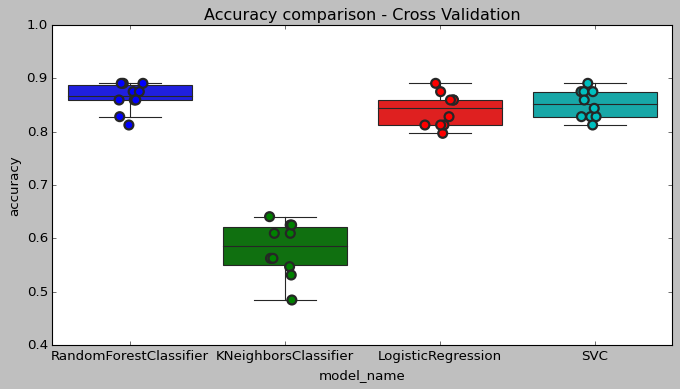

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title("Accuracy comparison - Cross Validation")
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [294]:
acc_rf = metrics.accuracy_score(y_test,y_pred_randforest)
f1_score_rf = metrics.f1_score(y_test, y_pred_randforest,average=None)

In [295]:
result.loc[5]= ['RandomForestClassifier',acc_rf,f1_score_rf,'Accuracy is good']

#Voting Classifier

In [231]:
class4sample = data[data['ylabeled']== 4].sample(30,random_state=5,replace=True)
class0sample = data[data['ylabeled']== 0].sample(30,random_state=5,replace=True)
class1 = data[data['ylabeled']==1].sample(30,random_state=5,replace=True)
class2 = data[data['ylabeled']==2].sample(30,random_state=5,replace=True)
class3 = data[data['ylabeled']==3].sample(30,random_state=5,replace=True)

In [232]:
golden_test_set = pd.concat([class4sample,class0sample,class1,class2,class3],axis=0)

In [233]:
golden_test_set.shape

(150, 3)

In [234]:
x_new_gts= golden_test_set.Description
print(x_new_gts.shape)


(150,)


In [235]:
max_words = 6000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_new_gts.values.astype('U'))
sequences = tok.texts_to_sequences(x_new_gts.values.astype('U'))
sequences_matrix_gts= sequence.pad_sequences(sequences,maxlen=max_len)


print(sequences_matrix_gts[0])

[  1 520   2   1 122   4   1  63 521  11 522   1 122 316   1  23   8   6
  10   1  16  53  97   4   1  15  53   2   1  47 152   1  45   3   1  23
 123   4 317   8  41   6  29 379 153   4  88 380 381   3  11  27 115  27
 154   8   1  23   6  33  98  27 523   8  14  99 524 124   1 221  27  16
   1 525   4 526  22 125 155   1 527 528 529   3   1  68 382 318 257 109
  88   1 530   2   1  38   1  42 531 319]


In [236]:
y_new_gts=golden_test_set.ylabeled
print(y_new_gts)

468    4
422    4
87     4
463    4
57     4
      ..
357    3
93     3
104    3
6      3
252    3
Name: ylabeled, Length: 150, dtype: int64


In [237]:
from sklearn.ensemble import VotingClassifier

In [238]:
voting_classifier= VotingClassifier(estimators=[ ('lr', logreg),('SVC',svcclassifier),('KNN',knn),('DT',classifier),('rf', rand_classifer), ('mnb', nb)],voting='hard', weights=None,)
voting_classifier.fit(sequences_matrix, y_train)
pred_voting_classifier = voting_classifier.predict(sequences_matrix_gts)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [296]:
print("VotingClassifier ACCURACY:",metrics.accuracy_score(y_new_gts,pred_voting_classifier))
print('VotingClassifier CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_new_gts,pred_voting_classifier))
print("===> **VotingClassifier F1 SCORE",metrics.f1_score(y_new_gts, pred_voting_classifier,average=None))
print("===> **VotingClassifier Recall SCORE",metrics.recall_score(y_new_gts, pred_voting_classifier,average=None))
print("===> **VotingClassifier Precision SCORE",metrics.precision_score(y_new_gts, pred_voting_classifier,average=None))


VotingClassifier ACCURACY: 0.7666666666666667
VotingClassifier CLASSIFIER CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         29   0   1   0   0
1          0  16   8   3   3
2          2   2  24   0   2
3          4   2   6  17   1
4          0   0   1   0  29
===> **VotingClassifier F1 SCORE [0.89230769 0.64       0.68571429 0.68       0.89230769]
===> **VotingClassifier Recall SCORE [0.96666667 0.53333333 0.8        0.56666667 0.96666667]
===> **VotingClassifier Precision SCORE [0.82857143 0.8        0.6        0.85       0.82857143]


In [297]:
acc_vc = metrics.accuracy_score(y_new_gts,pred_voting_classifier)
f1_score_vc = metrics.f1_score(y_new_gts, pred_voting_classifier,average=None)

In [298]:
result.loc[6]= ['VotingClassifier hard voting',acc_vc,f1_score_vc,'Accuracy is not good']

In [243]:
voting_classifier= VotingClassifier(estimators=[ ('lr', logreg),('SVC',svcclassifier),('KNN',knn),('DT',classifier),('rf', rand_classifer), ('mnb', nb)],voting='soft', weights=None,)
voting_classifier.fit(sequences_matrix, y_train)
pred_voting_classifier = voting_classifier.predict(sequences_matrix_gts)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [241]:
print("VotingClassifier ACCURACY:",metrics.accuracy_score(y_new_gts,pred_voting_classifier))
print('VotingClassifier  CONFUSTION MATRIX:',pd.crosstab(y_new_gts,pred_voting_classifier))
print("===> **VotingClassifier F1 SCORE",metrics.f1_score(y_new_gts, pred_voting_classifier,average=None))
print("===> **VotingClassifier Recall SCORE",metrics.recall_score(y_new_gts, pred_voting_classifier,average=None))
print("===> **VotingClassifier Precision SCORE",metrics.precision_score(y_new_gts, pred_voting_classifier,average=None))
#print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_new_gts, pred_voting_classifier,average=None))

VotingClassifier ACCURACY: 0.7333333333333333
VotingClassifier  CONFUSTION MATRIX: col_0      0   1   2   3   4
ylabeled                    
0         29   0   1   0   0
1          2  14   8   3   3
2          4   2  23   1   0
3          6   1   7  15   1
4          0   0   1   0  29
===> **VotingClassifier F1 SCORE [0.81690141 0.59574468 0.65714286 0.6122449  0.92063492]
===> **VotingClassifier Recall SCORE [0.96666667 0.46666667 0.76666667 0.5        0.96666667]
===> **VotingClassifier Precision SCORE [0.70731707 0.82352941 0.575      0.78947368 0.87878788]


In [300]:
acc_vc_soft = metrics.accuracy_score(y_new_gts,pred_voting_classifier)
f1_score_vc_soft = metrics.f1_score(y_new_gts, pred_voting_classifier,average=None)

In [301]:
result.loc[7]= ['VotingClassifier soft voting',acc_vc_soft,f1_score_vc_soft,'Accuracy is not too good']

In [302]:
result

,model,Accuracy,F1_score,Comments
0,Logistic Regression,0.875000,"[0.975609756097561, 0.7222222222222222, 0.8941...","Accuracy is good,f1 score for all classes are ..."
1,KNN Classifier,0.806250,"[0.8695652173913044, 0.7586206896551724, 0.833...","Accuracy is 80, class3 f1 score is too less"
2,SVC Classifier,0.875000,"[0.975609756097561, 0.7333333333333334, 0.8387...",Accuracy is good
3,Multinominal Naive bais Classifier,0.493750,"[0.6268656716417911, 0.3, 0.514851485148515, 0...",Accuracy is poor
4,DecisionTreeClassifier,0.650000,"[0.7857142857142856, 0.10526315789473684, 0.64...",Accuracy is poor
5,RandomForestClassifier,0.868750,"[0.9523809523809523, 0.7857142857142858, 0.812...",Accuracy is good
6,VotingClassifier hard voting,0.766667,"[0.8923076923076922, 0.64, 0.6857142857142857,...",Accuracy is not good
7,VotingClassifier soft voting,0.766667,"[0.8923076923076922, 0.64, 0.6857142857142857,...",Accuracy is not too good


#Vanila Neural network with new dataset

In [251]:
vanilla_model = Sequential()
vanilla_model.add(Embedding(5000, 128, input_length=max_len)) #vOCABSIZE IS 5000
vanilla_model.add(BatchNormalization())
vanilla_model.add(Flatten())
vanilla_model.add(Dense(500, activation='relu'))
vanilla_model.add(BatchNormalization())
vanilla_model.add(Dense(250, activation='relu'))
vanilla_model.add(BatchNormalization())
vanilla_model.add(Dropout(0.4))
vanilla_model.add(Dense(125, activation='relu'))
vanilla_model.add(BatchNormalization())
vanilla_model.add(Dropout(0.3))
vanilla_model.add(Dense(60, activation='relu'))
vanilla_model.add(BatchNormalization())
vanilla_model.add(Dropout(0.3))
vanilla_model.add(Dense(5, activation='softmax'))
vanilla_model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [252]:
vanilla_model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 128)          640000    
_________________________________________________________________
batch_normalization_10 (Batc (None, 100, 128)          512       
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 500)               6400500   
_________________________________________________________________
batch_normalization_11 (Batc (None, 500)               2000      
_________________________________________________________________
dense_33 (Dense)             (None, 250)               125250    
_________________________________________________________________
batch_normalization_12 (Batc (None, 250)             

In [253]:
print(y_train.shape)
print(sequences_matrix.shape)

(640,)
(640, 100)


In [254]:
NN_Model = vanilla_model.fit(sequences_matrix, y_train_enc, batch_size=8, epochs=50,validation_split=0.15,verbose=2)

Epoch 1/50
68/68 - 5s - loss: 2.1528 - accuracy: 0.2574 - val_loss: 1.5951 - val_accuracy: 0.1875
Epoch 2/50
68/68 - 3s - loss: 1.6576 - accuracy: 0.3915 - val_loss: 1.6105 - val_accuracy: 0.1562
Epoch 3/50
68/68 - 3s - loss: 1.5064 - accuracy: 0.4449 - val_loss: 1.6279 - val_accuracy: 0.1979
Epoch 4/50
68/68 - 3s - loss: 1.3751 - accuracy: 0.4853 - val_loss: 1.6246 - val_accuracy: 0.1979
Epoch 5/50
68/68 - 3s - loss: 1.3186 - accuracy: 0.4963 - val_loss: 1.5343 - val_accuracy: 0.2812
Epoch 6/50
68/68 - 3s - loss: 1.2552 - accuracy: 0.5276 - val_loss: 1.4530 - val_accuracy: 0.3229
Epoch 7/50
68/68 - 3s - loss: 1.2019 - accuracy: 0.5496 - val_loss: 1.3278 - val_accuracy: 0.4792
Epoch 8/50
68/68 - 3s - loss: 1.1298 - accuracy: 0.5864 - val_loss: 1.1650 - val_accuracy: 0.5729
Epoch 9/50
68/68 - 3s - loss: 1.1145 - accuracy: 0.5515 - val_loss: 1.0277 - val_accuracy: 0.6458
Epoch 10/50
68/68 - 3s - loss: 1.0654 - accuracy: 0.5717 - val_loss: 0.9102 - val_accuracy: 0.7292
Epoch 11/50
68/68 -

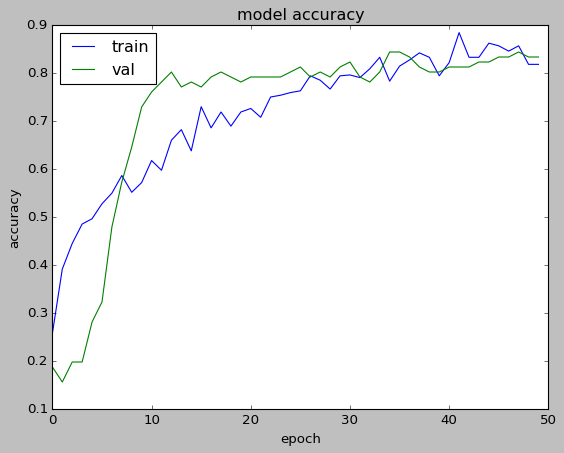

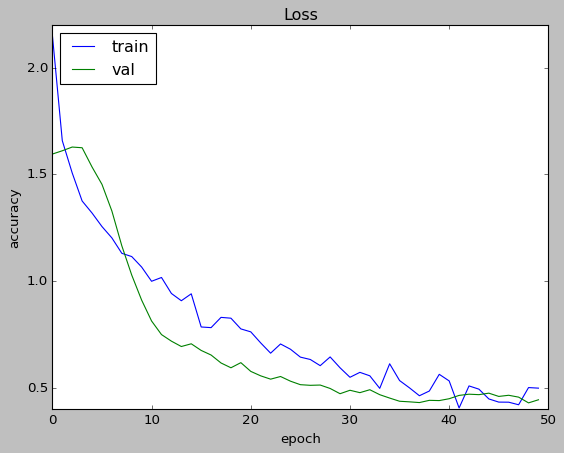

In [255]:
plt.plot(NN_Model.history['accuracy'])
plt.plot(NN_Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(NN_Model.history['loss'])
plt.plot(NN_Model.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [256]:
pred_NN = vanilla_model.predict_classes(sequences_matrix_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [257]:
pred_NN = pd.DataFrame(pred_NN,columns=['pred'])


In [258]:
pred_NN.pred

0      4
1      2
2      4
3      3
4      0
      ..
155    0
156    3
157    3
158    2
159    4
Name: pred, Length: 160, dtype: int64

In [259]:
print(metrics.confusion_matrix(y_test,pred_NN.pred))
metrics.recall_score(y_test,pred_NN.pred,average=None)

[[40  0  0  0  0]
 [ 0 13  3  1  0]
 [ 0  9 31  1  0]
 [ 0  6  2 17  1]
 [ 0  0  0  1 35]]


array([1.        , 0.76470588, 0.75609756, 0.65384615, 0.97222222])

In [260]:
print("vanilla_model ACCURACY:",metrics.accuracy_score(y_test,pred_NN.pred))
print("===> **vanilla_model F1 SCORE",metrics.f1_score(y_test, pred_NN.pred,average=None))
print("===> **vanilla_model Recall SCORE",metrics.recall_score(y_test, pred_NN.pred,average=None))
print("===> **vanilla_model Precision SCORE",metrics.precision_score(y_test, pred_NN.pred,average=None))

vanilla_model ACCURACY: 0.85
===> **vanilla_model F1 SCORE [1.         0.57777778 0.80519481 0.73913043 0.97222222]
===> **vanilla_model Recall SCORE [1.         0.76470588 0.75609756 0.65384615 0.97222222]
===> **vanilla_model Precision SCORE [1.         0.46428571 0.86111111 0.85       0.97222222]


In [303]:
Vanila_network_acc = metrics.accuracy_score(y_test,pred_NN.pred)
vanila_network_f1score = metrics.f1_score(y_test, pred_NN.pred,average=None)

In [304]:
result.loc[8]= ['Vanila Neural Network',Vanila_network_acc,vanila_network_f1score,'Accuracy is good']

#Bi Directional Lstm Model with new dataset

In [269]:
lstm_model_2= Sequential()
lstm_model_2.add(tf.keras.layers.Input(shape=(None,)))
lstm_model_2.add(tf.keras.layers.Embedding(5000, 100, mask_zero=True))
lstm_model_2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_state=False,recurrent_dropout=0.1)))
lstm_model_2.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
lstm_model_2.add(tf.keras.layers.Dense(5, activation=tf.keras.activations.softmax))

lstm_model_2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



In [270]:
lstm_model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 100)         500000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_39 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 505       
Total params: 681,405
Trainable params: 681,405
Non-trainable params: 0
_________________________________________________________________


In [271]:
LSTM_Model_2 = lstm_model_2.fit(sequences_matrix, y_train_enc, batch_size=8, epochs=20,validation_split=0.15,verbose=2)

Epoch 1/20
68/68 - 21s - loss: 1.4834 - accuracy: 0.3952 - val_loss: 1.3046 - val_accuracy: 0.6458
Epoch 2/20
68/68 - 17s - loss: 0.8238 - accuracy: 0.7224 - val_loss: 0.6530 - val_accuracy: 0.7604
Epoch 3/20
68/68 - 17s - loss: 0.3729 - accuracy: 0.8603 - val_loss: 0.5846 - val_accuracy: 0.8438
Epoch 4/20
68/68 - 17s - loss: 0.1132 - accuracy: 0.9651 - val_loss: 0.7027 - val_accuracy: 0.8229
Epoch 5/20
68/68 - 17s - loss: 0.0231 - accuracy: 0.9982 - val_loss: 0.6621 - val_accuracy: 0.8646
Epoch 6/20
68/68 - 17s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8039 - val_accuracy: 0.8438
Epoch 7/20
68/68 - 17s - loss: 5.7300e-04 - accuracy: 1.0000 - val_loss: 0.8456 - val_accuracy: 0.8542
Epoch 8/20
68/68 - 17s - loss: 3.6114e-04 - accuracy: 1.0000 - val_loss: 0.8971 - val_accuracy: 0.8542
Epoch 9/20
68/68 - 17s - loss: 2.8219e-04 - accuracy: 1.0000 - val_loss: 0.9326 - val_accuracy: 0.8542
Epoch 10/20
68/68 - 17s - loss: 2.1915e-04 - accuracy: 1.0000 - val_loss: 0.9642 - val_accuracy: 

In [272]:
pred_LSTM = lstm_model_2.predict_classes(sequences_matrix_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [273]:
pred_LSTM_2 = pd.DataFrame(pred_LSTM,columns=['pred'])
pred_LSTM_2

,pred
0,4
1,2
2,4
3,3
4,0
...,...
155,0
156,3
157,2
158,2


In [274]:
print(metrics.confusion_matrix(y_test,pred_LSTM_2.pred))
print(metrics.f1_score(y_test,pred_NN.pred,average=None))
print(metrics.recall_score(y_test,pred_NN.pred,average=None))

[[40  0  0  0  0]
 [ 0 14  1  2  0]
 [ 0  5 31  5  0]
 [ 0  3  8 14  1]
 [ 0  0  0  1 35]]
[1.         0.57777778 0.80519481 0.73913043 0.97222222]
[1.         0.76470588 0.75609756 0.65384615 0.97222222]


In [275]:
print("Bidirectional lstm_model ACCURACY:",metrics.accuracy_score(y_test,pred_LSTM_2.pred))
#print('VotingClassifier  CONFUSTION MATRIX:',pd.crosstab(y_test,pred_LSTM_2.pred))
print("===> **Bidirectional lstm_model ACCURACY F1 SCORE",metrics.f1_score(y_test, pred_LSTM_2.pred,average=None))
print("===> **Bidirectional lstm_model ACCURACY Recall SCORE",metrics.recall_score(y_test, pred_LSTM_2.pred,average=None))
print("===> **Bidirectional lstm_model ACCURACY Precision SCORE",metrics.precision_score(y_test, pred_LSTM_2.pred,average=None))
#print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_new_gts, pred_voting_classifier,average=None))

Bidirectional lstm_model ACCURACY: 0.8375
===> **Bidirectional lstm_model ACCURACY F1 SCORE [1.         0.71794872 0.7654321  0.58333333 0.97222222]
===> **Bidirectional lstm_model ACCURACY Recall SCORE [1.         0.82352941 0.75609756 0.53846154 0.97222222]
===> **Bidirectional lstm_model ACCURACY Precision SCORE [1.         0.63636364 0.775      0.63636364 0.97222222]


In [306]:
bilstm_acc = metrics.accuracy_score(y_test,pred_LSTM_2.pred)
bilstm_f1score = metrics.f1_score(y_test, pred_LSTM_2.pred,average=None)                          

In [307]:
result.loc[9]= ['Bi directional Neural Network',bilstm_acc,bilstm_f1score,'Accuracy and f1 score is good']

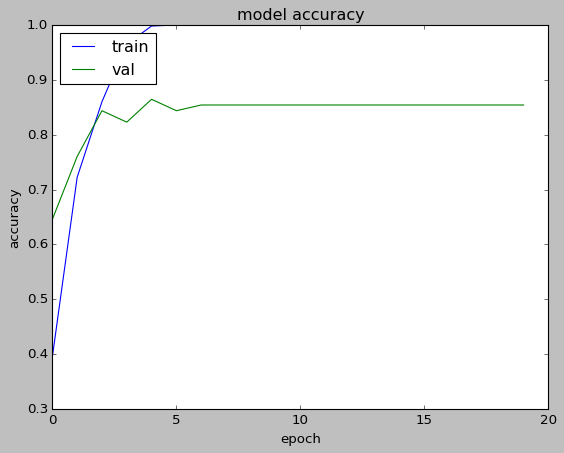

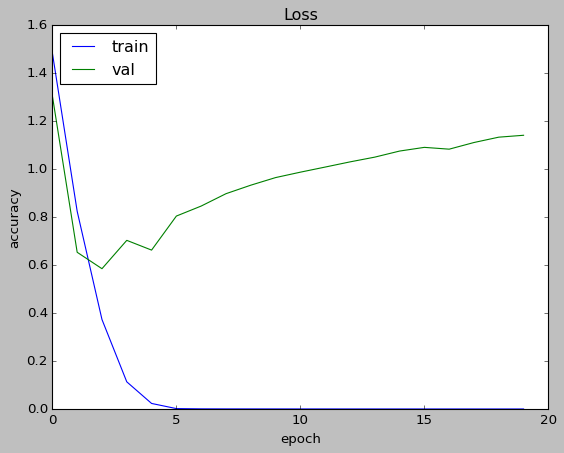

In [276]:
plt.plot(LSTM_Model_2.history['accuracy'])
plt.plot(LSTM_Model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(LSTM_Model_2.history['loss'])
plt.plot(LSTM_Model_2.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Results

In [308]:
result

,model,Accuracy,F1_score,Comments
0,Logistic Regression,0.875000,"[0.975609756097561, 0.7222222222222222, 0.8941...","Accuracy is good,f1 score for all classes are ..."
1,KNN Classifier,0.806250,"[0.8695652173913044, 0.7586206896551724, 0.833...","Accuracy is 80, class3 f1 score is too less"
2,SVC Classifier,0.875000,"[0.975609756097561, 0.7333333333333334, 0.8387...",Accuracy is good
3,Multinominal Naive bais Classifier,0.493750,"[0.6268656716417911, 0.3, 0.514851485148515, 0...",Accuracy is poor
4,DecisionTreeClassifier,0.650000,"[0.7857142857142856, 0.10526315789473684, 0.64...",Accuracy is poor
5,RandomForestClassifier,0.868750,"[0.9523809523809523, 0.7857142857142858, 0.812...",Accuracy is good
6,VotingClassifier hard voting,0.766667,"[0.8923076923076922, 0.64, 0.6857142857142857,...",Accuracy is not good
7,VotingClassifier soft voting,0.766667,"[0.8923076923076922, 0.64, 0.6857142857142857,...",Accuracy is not too good
8,Vanila Neural Network,0.850000,"[1.0, 0.5777777777777777, 0.8051948051948052, ...",Accuracy is good
9,Bi directional Neural Network,0.837500,"[1.0, 0.717948717948718, 0.7654320987654322, 0...",Accuracy and f1 score is good


After analyzing all the Machine learning and deep learning model evaluation matrics by considering accuracy and f1 score, finalized the Bidirectional LSTM model is good without overfitting test results and with fewer modulations in the loss.